# 1. Generative AI for **Visuals**

In [1]:
pip install accelerate

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 4.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from diffusers import StableDiffusionPipeline  # Too slowww
from keras_cv.models import StableDiffusion
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

2024-03-20 00:56:47.029830: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 00:56:47.029954: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 00:56:47.332345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
model_diffusion = StableDiffusion(img_width=512, img_height=512)  # Stable Diffusion model

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [6]:
def generate_images(prompt, batch_size):
    """Generates images using Stable Diffusion."""
    images = model_diffusion.text_to_image(prompt, batch_size=batch_size)
    return images


In [7]:
# Testing
prompt = "Car"
generated_images = generate_images(prompt,2)

1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


I0000 00:00:1710896251.534302     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1710896251.555491     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


W0000 00:00:1710896348.792693     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.795649     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.805499     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.808467     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.815057     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.826593     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.829989     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1710896348.833369     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


2024-03-20 01:00:32.435408: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng36{k2=3,k3=0} for conv (f32[2,512,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,512,256,256]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-03-20 01:00:33.055961: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.620763898s
Trying algorithm eng36{k2=3,k3=0} for conv (f32[2,512,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[2,512,256,256]{3,2,1,0}, f32[512,512,3,3]{3,2,1,0}, f32[512]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha"

In [8]:
import matplotlib.pyplot as plt

def plot_images(images):
    # Plot each generated image separately
    for i, image in enumerate(images):
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis("off")
        plt.title(f"Image {i+1}")
        plt.show()


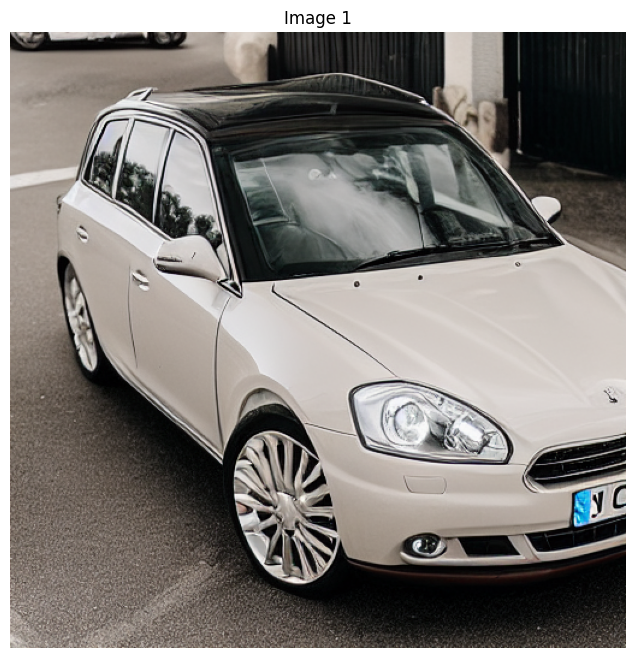

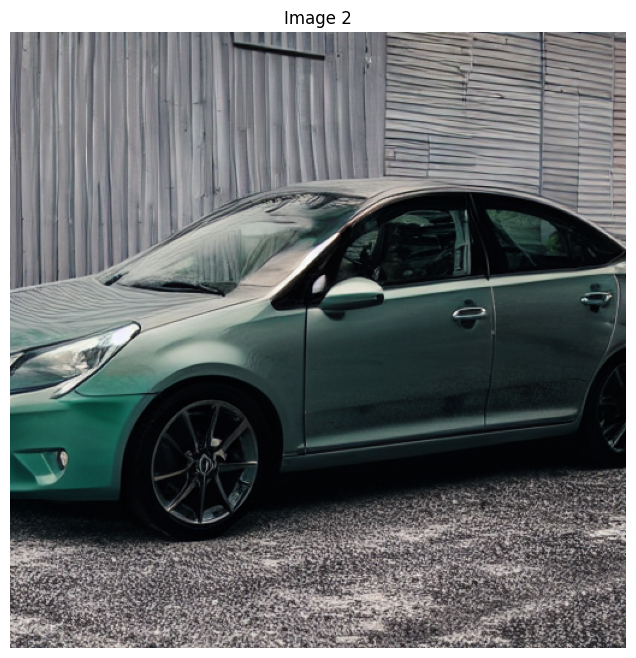

In [9]:
plot_images(generated_images)

# 2. Product Recognition aka Classification

In [10]:
# Load pre-trained EfficientNetV2B0 for image classification
model_classification = EfficientNetV2B0(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

29403144/29403144 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
def preprocess_images(images):
  """Preprocesses images for EfficientNetV2B0."""
  preprocessed_images = []
  for image in images:
    # Assuming images are already in RGB format (if not, convert here)
    image_array = np.array(image)  # Assuming images are already NumPy arrays
    # Resize images to match the input shape expected by EfficientNetV2B0 (224x224)
    resized_image = tf.image.resize(image_array, (224, 224))
    # Preprocess images for EfficientNetV2B0
    preprocessed_image = preprocess_input(resized_image)
    preprocessed_images.append(preprocessed_image)
  return np.stack(preprocessed_images)  # Stack preprocessed images into a batch

In [12]:
def classify_images(images, model):
  """Classifies images using EfficientNetV2B0."""
  preprocessed_images = preprocess_images(images)  # Preprocess and resize images
  predictions = model.predict(preprocessed_images)    # Make predictions
  decoded_predictions = decode_predictions(predictions, top=3) # Decode predictions
  return decoded_predictions

In [13]:
# Classify
classified_images = classify_images(generated_images, model_classification)
print(classified_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[('n02814533', 'beach_wagon', 0.7663117), ('n03770679', 'minivan', 0.043933935), ('n03459775', 'grille', 0.040892623)], [('n02814533', 'beach_wagon', 0.30414304), ('n04285008', 'sports_car', 0.22861756), ('n02974003', 'car_wheel', 0.22472924)]]


Classification using MobileNetV2 

In [47]:
classified_images

[[('n02814533', 'beach_wagon', 0.7663117),
  ('n03770679', 'minivan', 0.043933935),
  ('n03459775', 'grille', 0.040892623)],
 [('n02814533', 'beach_wagon', 0.30414304),
  ('n04285008', 'sports_car', 0.22861756),
  ('n02974003', 'car_wheel', 0.22472924)]]

In [14]:
# # Load a pre-trained MobileNetV2 model for image classification
# model_classification = tf.keras.applications.MobileNetV2(weights='imagenet')

In [15]:
# def classify_images(images, model):

#     preprocessed_images = preprocess_images(images)


#     predictions = model.predict(preprocessed_images)


#     decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions)

#     return decoded_predictions

In [16]:
# classified_images = classify_images(generated_images, model_classification)
# print(classified_images)

# 3. Exclusion of Non-Relevant Images:
- Implement a mechanism to filter out images that do not contain any of the specified products. This ensures that only
relevant visuals are processed and enhanced.


In [54]:
def find_target_products(classified_images, target_products):
    """
    Searches for the target products in the classification results.
    
    Args:
        classified_images (list): List of lists of tuples representing classification results for each image.
        target_products (list): List of target product names to search for.
        
    Returns:
        bool: True if any of the target products are found, False otherwise.
    """
    for image_classifications in classified_images:
        for class_id, class_label, _ in image_classifications:
            if class_label in target_products:
                return True
    
    return False

In [59]:
# Define the target products you want to search for
target_products = ['sports_car']

if find_target_products(classified_images, target_products):
    print("Target product found")
else:
    print("Could not find the target product")

Target product found
